# Tutorial de Variedades 
## El ejemplo del espacio tiempo de Schwarzschild 

This notebook demonstrates some SageMath tools for pseudo-Riemannian geometry, developed through the [SageManifolds project](https://sagemanifolds.obspm.fr/), by these [authors](https://sagemanifolds.obspm.fr/authors.html). 

This notebook requires a version of SageMath at least equal to 9.0:

In [122]:
version()

'SageMath version 9.1, Release Date: 2020-05-20'

First we set up the notebook to display outputs via LaTeX rendering:

In [123]:
%display latex 

Since some computations are quite heavy, we ask for running them in parallel on 8 
threads:

In [124]:
Parallelism().set(nproc=8)

# Concepto de Variedad

En relatividad general, el espacio tiempo es modelado por la estructura matemática denominada variedad diferenciable real. Para una mejor comprensión de dicho objeto, partiremos desde la noción más básica de variedad real $M$. Esta es entendida como un espacio topológico cuyos puntos pertenecientes a sus subconjuntos abiertos $U_{i}$ llamados parches son mapeados a través de un homeomorfismo $\sigma_{i}$ a una tupla de $n$ números reales pertenecientes a $R^{n}$. La dupla $(U_{i},\sigma_{i})$ se denomina carta. Los físicos usualmente se refieren a ella como las coordenadas de la variedad.

$$\sigma_{i}: U_{i} \subset M \rightarrow R^{n}$$

$$\sigma_{i}(p) = (x^{1},x^{2},......,x^{n}),  p \in U_{i}$$

Donde el conjunto de cartas {$ U_{i},\sigma_{i}$} conocido como atlas cubre completamente la variedad, es decir, $\cup_{i} U_{i}=M$ y todos los puntos de la variedad son mapeados a $R^{n}$ a través de algún homeomorfismo. El número menor de números reales que se necesita para específicar los puntos de la variedad se le conoce como su dimensión, la cual en este caso es $n$. Además, si para dos mapas arbitrarios $\psi$ y $\sigma$, donde $\psi: U_{\alpha}\rightarrow R^{n}$, $\sigma: U_{\beta}\rightarrow R^{n}$ y $U_{\alpha}\cap U_{\beta}\neq \emptyset$, para un punto $p\in U_{\alpha}\cap U_{\beta}$

$$\sigma(p) = (x^{1},x^{2},......,x^{n})$$

$$\psi(p) = (x'^{1},x'^{2},......,x'^{n})$$

existe un mapa denominado de transición $\phi: X\rightarrow R^{n}$, donde $X=\sigma(U_{\alpha}\cap U_{\beta})\subset R^{n}$, dado por la composición $ \phi=\psi(\sigma^{-1})$ que relaciona las dos tuplas en $R^{n}$ que identifican al punto $p$.



$$      \phi((x^{1},x^{2},......,x^{n}))=(x'^{1},x'^{2},......,x'^{n})$$

Los físicos llaman a dicho mapa como transformación de coordenadas. Como  $\phi$ es un mapa entre espacios euclidianos, podemos aplicar lo que conocemos de cálculo diferencial para describirlo. Si los mapas de transición son solamente continuos, la variedad es conocida por ser topológica, mientras que si pertenecen a $C^{\infty}$, es decir, además de ser continuas sus derivadas parciales son infinitamente diferenciables en $X \subset R^{n}$, se le denomina como variedad diferenciable o suave la cual es justamente la de interés en relatividad general pues dicha estructura diferencial permite escribir las ecuaciones de movimiento las cuales son ecuaciones diferenciales. Finalmente, como $\phi$ es biyectivo y $\phi$ y $\phi^{-1}$ $\in C^{\infty}$, entonces es un caso especial de difeomorfismo de $M$ en $M$.



Como ejemplo, definimos una variedad diferencial creando un objeto con la clase "Manifold", específicamos en su argumento su dimensión(4) y el nombre(M) y finalmente le asignamos una varaible M para poder usarlo convenientemente.

In [125]:
M=Manifold(4, 'M')
M


4-dimensional differentiable manifold M

$M$ is in the category of smooth manifolds over the real field:

Usando la función category, verificamos nuevamente si es diferenciable o también suave en $R^{4}$.

In [126]:
M.category()

Category of smooth manifolds over Real Field with 53 bits of precision

## Cartas

Como vimos en la definición, la variedad debe estar equipada con cartas las cuales coloquialmente son las coordenadas que identifican los puntos de la variedad. Introducimos las carta de Schwarzchild $(t,r,\theta,\phi)$ en el objeto M usando el método chart y le asignamos la variable SD. El argumento de chart() es una raw string por ello tiene la letra "r" y las comillas. Dentro de este se coloca los dominios de las coordenadas. Si la coordenada puede tener cualquier valor real, no es necesario especificarla y solo se la coloca dentro del string.

In [127]:
SD.<t, r, th, ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi:periodic")

Para observar la variedad con su respectiva carta, compilamos la variable SD.

In [128]:
SD

Chart (M, (t, r, th, ph))

Para observar el dominio de las coordenadas, ejecutamos la función coord_range() sobre nuestro el objeto SD.

In [129]:
SD.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

The manifold (user) atlas is no longer empty: 

Como vimos en la definición de variedad, se pueden incluir más cartas para mapear los puntos de la variedad. En este caso, introducimos las coordenadas de Eddington-Finkelstein. La diferencia única diferencia es en la coordenada temporal pues ahora se escribe como $T$, aunque su dominio no cambia con respecto a las coordenadas de Schwarzchild.

In [130]:
EF.<T, r, th, ph> = M.chart(r"T r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi:periodic")
EF

Chart (M, (T, r, th, ph))

Constatamos que el atlas de la variedad M posee dos cartas. Para ello usamos la función atlas() en el objeto M.

In [131]:
M.atlas()

[Chart (M, (t, r, th, ph)), Chart (M, (T, r, th, ph))]

Como los parches de ambas cartas se intersectan, debe existir un mapa de transición entre ambas. Como dicho mapa involucra tiene un parametro de masa, esta tiene que ser especifica como el la función var(). Además, la masa es mayor que cero.

In [132]:
m = var('m')
assume(m > 0)

Para realizar la transformación de coordenadas, usamos el método transition_map() sobre nuestro objeto el cual es la carta de Schwarzchild. En el argumento se escribe la manera como las coordenadas de ambas cartas están relacionadas.

In [133]:
SD_to_EF = SD.transition_map(EF, [t +2*m*ln(abs(r/(2*m)-1)), r, th, ph])
SD_to_EF.display()

T = 2*m*log(abs(1/2*r/m - 1)) + t
r = r
th = th
ph = ph

In [134]:
SD_to_EF.inverse().display()

t = 2*m*log(2) + 2*m*log(m) - 2*m*log(abs(-2*m + r)) + T
r = r
th = th
ph = ph

La primera carta definida, en este caso, la de Schwarzschild, es la carta por defecto. Esto lo podemos verificar aplicando el método default_chart() en el objeto M.

In [135]:
M.default_chart()

Chart (M, (t, r, th, ph))

Las coordenadas de Schwarzschild pueden graficarse dentro de la carta de Eddington-Finkelstein. Las coordenadas se observan como curvas, es decir, en estas las coordenadas $t,r$ permanecen constantes. Para ello, usamos el método plot en la carta de Schwarzschild SD y las gráficamos dentro de la carta EF. En el argumento definimos los límites del dominio de $t$ y $r$. Para graficar en dos dimensiones, fijamos las coordenadas $\phi$ y $\theta$ y por tanto las coordenadas de ambiente son $T$ y $r$. Asimismo, se coloca el estilo del delineado de las curvas $t$ y $r$. Además, como la función de transición entre cartas depende de un parámetro m, necesitamos colocar su valor. Finalmente, seleccionamos el color de las curvas y el número de ellas que se presentan en el gráfico. La gráfica diverge en $r=2$ pues el mapa de transición no está definido en ese punto. Por ello, separamos en dos gráficas los valores menores a $r=2$ y los mayores a este mismo. Si en "number_values" número de curvas para $t$ y $r$ diferentes de cero, entonces ambas tendrán el mismo color. Por ello cada región del gráfico separada por $r=2$ consiste en dos SD.plot(...) donde en cada una una de las coordenadas será cero para que tengan colores diferentes. En total, estos nos produce cuatro SD.plot(...). Finalmente, agregamos texto para agregar una leyenda que nos especifique las curvas y las coordenadas que representan. Esto se realiza usando la función text(...). En su argumento colocamos el texto usando un "string", con una tupla le asignamos su lugar en el gráfico, y luego su color respectivo.

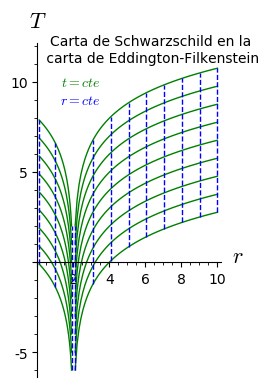

In [230]:
plot1 = SD.plot(EF, ranges={t:(0, 8), r:(2.1, 10)}, fixed_coords={th:pi/2, ph:0}, 
                ambient_coords=(r,T), style={t:'--', r:'-'}, parameters={m: 1}, color='green',number_values={t: 9, r: 0}) \
        +SD.plot(EF, ranges={t:(0, 8), r:(2.1, 10)}, fixed_coords={th:pi/2, ph:0}, 
                ambient_coords=(r,T), style={t:'--', r:'-'}, parameters={m: 1}, color='blue',number_values={t: 0, r:9}) \
        + SD.plot(EF, ranges={t:(0, 8), r:(0.1, 1.9)}, fixed_coords={th:pi/2, ph:0}, 
                  ambient_coords=(r,T), number_values={t: 9, r: 0},
                  style={t:'--', r:'-'}, parameters={m: 1}, color='green')\
        + SD.plot(EF, ranges={t:(0, 8), r:(0.1, 1.9)}, fixed_coords={th:pi/2, ph:0}, 
                  ambient_coords=(r,T), number_values={t: 0, r: 3},
                  style={t:'--', r:'-'}, parameters={m: 1}, color='blue')
r_c = text('$r=cte$', (2.4,9),color='blue')
t_c = text('$t=cte$', (2.4,10),color='green')

plot1+r_c+t_c+ text('Carta de Schwarzschild en la \n carta de Eddington-Filkenstein ', (6.4,11.8),color='black')

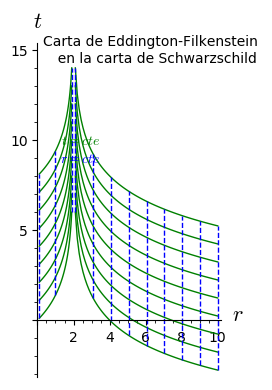

In [238]:
plot1 = EF.plot(SD, ranges={T:(0, 8), r:(2.1, 10)}, fixed_coords={th:pi/2, ph:0}, 
                ambient_coords=(r,t), style={T:'--', r:'-'}, parameters={m: 1}, color='green',number_values={T: 9, r: 0}) \
        +EF.plot(SD, ranges={T:(0, 8), r:(2.1, 10)}, fixed_coords={th:pi/2, ph:0}, 
                ambient_coords=(r,t), style={T:'--', r:'-'}, parameters={m: 1}, color='blue',number_values={T: 0, r:9}) \
        + EF.plot(SD, ranges={T:(0, 8), r:(0.1, 1.9)}, fixed_coords={th:pi/2, ph:0}, 
                  ambient_coords=(r,t), number_values={T: 9, r: 0},
                  style={T:'--', r:'-'}, parameters={m: 1}, color='green')\
        + EF.plot(SD, ranges={T:(0, 8), r:(0.1, 1.9)}, fixed_coords={th:pi/2, ph:0}, 
                  ambient_coords=(r,t), number_values={T: 0, r: 3},
                  style={T:'--', r:'-'}, parameters={m: 1}, color='blue')
r_c = text('$r=cte$', (2.4,9),color='blue')
t_c = text('$t=cte$', (2.4,10),color='green')

plot1+r_c+t_c+ text('Carta de Eddington-Filkenstein \n  en la carta de Schwarzschild', (6.4,15),color='black')

## Puntos en la variedad

Podemos señalar puntos de la variedad a través la sintáxis padre y elemento. Usamos el objeto M(...) y en el argumento especificamos el punto usando las coordenadas, y luego le asignamos una variable. Este punto corresponde a la carta de  Schwarzschild pues es la carta por defecto.

In [137]:
p = M((m, 8*m, pi/2, 0), name='p')
print(p)

Point p on the 4-dimensional differentiable manifold M


Para imprimir las coordenadas del punto p de la variedad nombramos la carta de Schwarzschild SD(...) y dentro de su argumento colocamos p.

In [138]:
SD(p)

(m, 8*m, 1/2*pi, 0)

Asimismo, podemos imprimir las coordenadas del mismo punto pero en la carta de Eddington-Finkelstein. Para ello usamos la carta EF(...) y dentro colocamos p. Esto es posible debido al mapa de transición entre ambas cartas.

In [139]:
EF(p)

(m*(2*log(3) + 1), 8*m, 1/2*pi, 0)

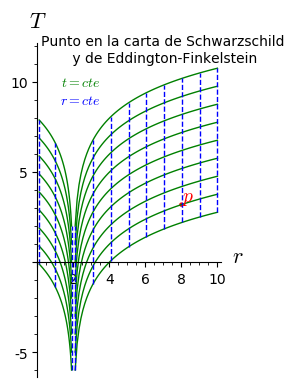

In [234]:
plot1 = SD.plot(EF, ranges={t:(0, 8), r:(2.1, 10)}, fixed_coords={th:pi/2, ph:0}, 
                ambient_coords=(r,T), style={t:'--', r:'-'}, parameters={m: 1}, color='green',number_values={t: 9, r: 0}) \
        +SD.plot(EF, ranges={t:(0, 8), r:(2.1, 10)}, fixed_coords={th:pi/2, ph:0}, 
                ambient_coords=(r,T), style={t:'--', r:'-'}, parameters={m: 1}, color='blue',number_values={t: 0, r: 9}) \
        + SD.plot(EF, ranges={t:(0, 8), r:(0.1, 1.9)}, fixed_coords={th:pi/2, ph:0}, 
                  ambient_coords=(r,T), number_values={t: 9, r: 0},
                  style={t:'--', r:'-'}, parameters={m: 1}, color='green')\
        + SD.plot(EF, ranges={t:(0, 8), r:(0.1, 1.9)}, fixed_coords={th:pi/2, ph:0}, 
                  ambient_coords=(r,T), number_values={t: 0, r: 3},
                  style={t:'--', r:'-'}, parameters={m: 1}, color='blue')
r_c = text('$r=cte$', (2.4,9),color='blue')
t_c = text('$t=cte$', (2.4,10),color='green')

plot2= plot1+r_c+t_c
plot2 += p.plot(EF, color='red', ambient_coords=(r,T), 
                parameters={m: 1}, label_offset=0.4, fontsize=14)
plot2+text('Punto en la carta de Schwarzschild \n y de Eddington-Finkelstein ', (7.1,11.8),color='black')


# Curvas en la variedad

Antes de definir los vectores tangentes, repasamos el concepto de curva $C$ de la variedad. Este es un mapa de $\alpha(k): I\subset R \rightarrow M$ donde $t$ es el parámetro de la curva e $I$ un intervalo abierto de $R$.Para estudiar sus propiedades de continuidad o diferenciabilidad, necesitamos mapear $\sigma(k)$ a $R^{n}$. Para ello, usamos una carta arbitraria $(U,\sigma)$ donde la curva $C \cap U \neq \emptyset$ y $\sigma^{o}\alpha(k): R \rightarrow R^{n}$. Si dicho mapa es continuo, la curva será continua, lo mismo que ocurre con la diferenciabilidad.



    
    
    
    
    

Para graficar una curva en el la variedad, primero definimos un parámetro k el cual está en principio definido en toa la recta real. Como vamos a graficarla en la carta de Schwarzschild, nos aseguramos que esta carta esté por defecto. En ese sentido, usamos el método set_default_chart(...) en el objeto M y dentro del argumento colocamos la carta SD. Como la curva depende de un parámetro, usamos la función Realline() y le asignamos su parámetro b. Después, definimos la curva como la aplicación de un método curve(...) en el objeto M y a ello le asignamos la variable c. Dentro del argumento colocamos la carta a usar que en este caso es la de Schwarzschild, la parametrización de las coordenadas en función del parámetro k, el intervalo de k, y el nombre de la curva. Finalmente, se grafica usando la función plot aplicado al objeto c, utilizamos ambient_coords para graficar la curva en dos dimensiones, aspect_ratio igual a 1 para que tanto la vertical y la horizontal desde el origen tengan el mismo tamaño, y también le asignamos un color.

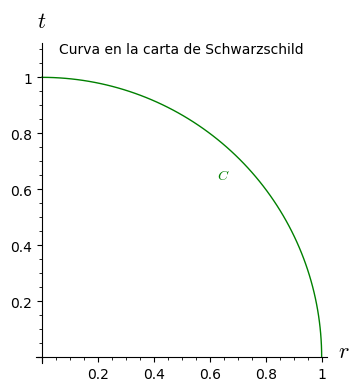

In [200]:
R.<b> = RealLine()

M.set_default_chart(SD)

c = M.curve({SD:[sin(b),cos(b),pi/2,0]},(b, 0, pi/2), name='c')


c.plot(ambient_coords=(r,t),aspect_ratio=1,color='green')+ text('$C$', (0.65,0.65),color='green')+ text('Curva en la carta de Schwarzschild', (0.5,1.1),color='black')

Para graficar la misma curva en la otra carta en la carta EF de Eddington Filkenstein usamos nuevamente set_default pero ahora en el argumento escribimos EF. Después, para conocer la parametrización de la curva en las nuevas coordenadas usamos el mapa de transición SD_to_EF(...) y dentro de su argumento colocamos la parametrización de la carta anterior lo cual nos da un tuple. Debido a que para la función plot la parametrización debe ser una lista, convertimos el tuple a una lista usando list(...). Además, usamos plot y desarrollamos un procedimiento análogo a la carta anterior con dos algunas diferencias. Una de ellas es usar la carta EF dentro del argumento de plot(...). Además, colocamos la lista de la parametrización en las nuevas coordenadas desarrolladas en la parte anterior. Finalmente, el aspect ratio lo ajustamos a 0.5 para que el gráfico se vea mejor.

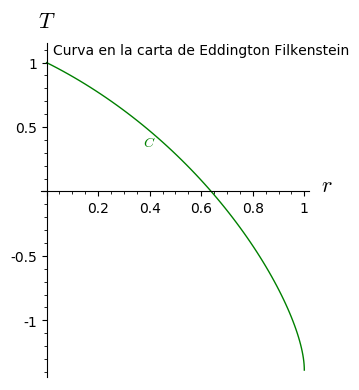

In [207]:
M.set_default_chart(EF)
M.set_default_chart(EF)
c2 = M.curve({EF: list(SD_to_EF(sin(b),cos(b),pi/2,0))},(b, 0, pi/2), name='c_2')
c2.plot(ambient_coords=(r,T),aspect_ratio=0.5,color='green',parameters={m:1})+text('$C$', (0.4,0.38),color='green')+ text('Curva en la carta de Eddington Filkenstein', (0.6,1.1),color='black')





# Vectores tangentes


Con la ayuda de las curvas podemos definir qué es un vector tangente a la variedad en un punto de la misma. Sea $\gamma_{i}(t)$ una familia de curvas donde cualquier par de sus elementos cumple las siguientes propiedades:

$$\gamma_{1}(0)=\gamma_{2}(0)=p,\;p\in M$$\\
$$ \frac{d}{dt}(\phi \circ \gamma_{1}(t))|_{t=0}=\frac{d}{dt}(\phi \circ \gamma_{2}(t))|_{t=0} $$

Donde $\phi$ es una carta que mapea las curvas a $R^{n}$. Por lo tanto la familia de curvas está dada por aquellas que pasan por el punto $p$ y que son tangentes entre sí, las cuales constituyen una relación de equivalencia por lo cual la familia de curvas conforma una clase de equivalencia $[\gamma_{i}]$ y sus elementos son sus representantes. Es decir, las curvas que pertenecen a una misma clase difieren en los ordenes cuadráticos de $t$ al ser expandidos al rededor de $t=0$ cuando son mapeados a $R^{n}$. Esto se escribe en componentes como:

$\phi^{u}(\gamma(t))=x^{u}(p) +t\frac{d \phi^{u}(\gamma(t))}{dt}\vert _{t=0} + O(t)$

La definición de curvas tangentes es consistente pues es independiente de la carta que se emplee. Adicionalmente, el conjunto de clases de equivalencia definidas en $p$ tiene la estructura de espacio vectorial por ello también se les conoce como los vectores tangentes a la variedad. Es decir un vector tangente es una clase de equivalencia de curvas que cumplen las condiciones anteriores y el cual suele representarse como una flecha en la dirección de tangencia de las curvas en $M$. Al espacio vectorial tangente se le denomina como $T_{p}M$. Para equiparla con dicha estructura se definen las operaciones de suma de vectores y multiplicación de un vector por un escalar $c\in R$.

$$[\gamma_{1}]+[\gamma_{2}]:= [\phi^{-}\circ(\phi(p)+t(\phi \circ \gamma_{1}+\phi \circ \gamma_{1})'(0))]$$\\
$$c[\gamma]:=[\phi^{-}\circ(\phi(p) +t(c(\phi\circ\gamma)'(0)))]$$

Además, el espacio $T_{p}M$ es isomorfo a $R^{n}$ y por lo tanto tienen la misma dimensión. Las definiciones de las operaciones deben ser consistente por lo cual son independientes de la carta $\phi$ y los representantes de las clases de equivalencia.

## Vector fields

When a chart is declared, the manifold is automatically endowed with some vector fields, those of the **coordinate vector frame**:

In [30]:
SD.frame()

Coordinate frame (M, (d/dt,d/dr,d/dth,d/dph))

In [31]:
EF.frame()

Coordinate frame (M, (d/dT,d/dr,d/dth,d/dph))

In [32]:
M.frames()

[Coordinate frame (M, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (M, (d/dT,d/dr,d/dth,d/dph))]

As for charts, there is a *default frame*, i.e. a vector frame that is used by default in functions having a vector frame in their arguments. The default frame can be changed by the method `set_default_frame`.

In [33]:
M.default_frame()

Coordinate frame (M, (d/dt,d/dr,d/dth,d/dph))

The first vector of the Schwarzschild-Droste coordinate frame:

In [34]:
vt = SD.frame()[0]
vt

Vector field d/dt on the 4-dimensional Lorentzian manifold M

In [35]:
vt.display()

d/dt = d/dt

In [36]:
vt.display(EF.frame())

d/dt = d/dT

The second vector of the Schwarzschild-Droste coordinate frame:

In [37]:
vr = SD.frame()[1]
vr

Vector field d/dr on the 4-dimensional Lorentzian manifold M

In [38]:
vr.display(EF.frame())

d/dr = -2*m/(2*m - r) d/dT + d/dr

Creating a vector field from scratch, by providing its components with rest to a given vector frame:

In [39]:
k = M.vector_field(1, -1, 0, 0, frame=EF.frame(), name='k')
k.display()

k = -r/(2*m - r) d/dt - d/dr

In [40]:
k.display(EF.frame())

k = d/dT - d/dr

Plot with respect to Schwarzschild-Droste coordinates (default chart):

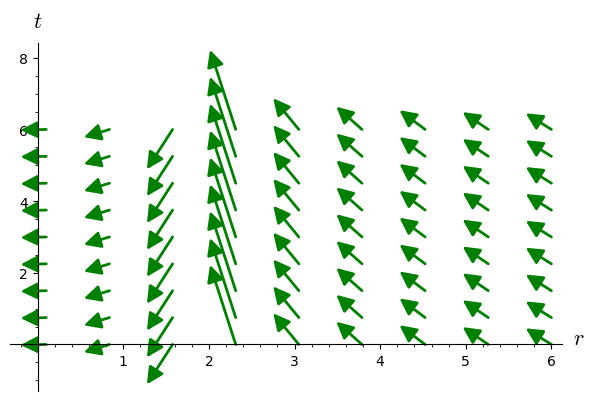

In [41]:
k.plot(ambient_coords=(r,t), fixed_coords={th: pi/2, ph: 0}, 
       ranges={t: (0, 6), r: (0.1, 6)}, number_values=9,
       parameters={m: 1}, color='green', scale=0.3)

Plot with respect to Eddington-Finkelstein coordinates:

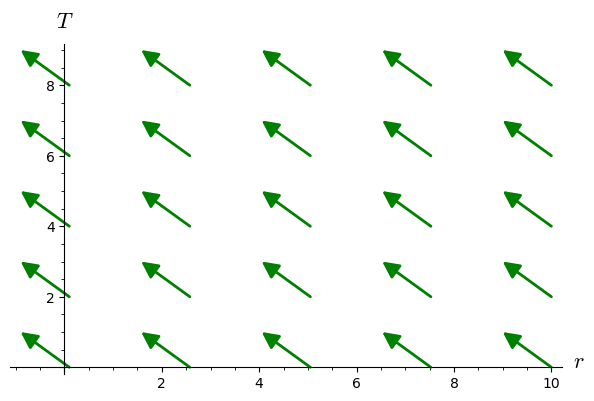

In [42]:
k.plot(chart=EF, ambient_coords=(r,T), chart_domain=EF,
       fixed_coords={th: pi/2, ph: 0}, ranges={T: (0, 8), r: (0.1, 10)}, 
       number_values=5, parameters={m: 1}, color='green')

### Vector fields as sections of the tangent bundle

In [43]:
TM = M.tangent_bundle()
print(TM)

Tangent bundle TM over the 4-dimensional Lorentzian manifold M


In [44]:
k1 = TM.section({EF.frame(): [1, -1, 0, 0]})
print(k1)

Vector field on the 4-dimensional Lorentzian manifold M


In [45]:
k1 == k

True

### The set of all vector fields on $M$ as a $C^\infty(M)$-module:

In [46]:
XM = M.vector_field_module()
print(XM)
XM

Free module X(M) of vector fields on the 4-dimensional Lorentzian manifold M


Free module X(M) of vector fields on the 4-dimensional Lorentzian manifold M

In [47]:
XM.base_ring()

Algebra of differentiable scalar fields on the 4-dimensional Lorentzian manifold M

In [48]:
print(XM.base_ring())

Algebra of differentiable scalar fields on the 4-dimensional Lorentzian manifold M


In [49]:
XM.base_ring().an_element().display()

M --> R
(t, r, th, ph) |--> 2
(T, r, th, ph) |--> 2

### Vectors at a point

The value of a vector field, and more generally of any tensor field, at a given point is obtained by the method `at`: 

In [50]:
kp = k.at(p)
print(kp)

Tangent vector k at Point p on the 4-dimensional Lorentzian manifold M


In [51]:
kp.display()

k = 4/3 d/dt - d/dr

The parent of `kp` is the tangent space at `p`:

In [52]:
kp.parent()

Tangent space at Point p on the 4-dimensional Lorentzian manifold M

In [53]:
print(kp.parent())

Tangent space at Point p on the 4-dimensional Lorentzian manifold M


It is accessible from the manifold via the method `tangent_space`:

In [54]:
kp.parent() is M.tangent_space(p)

True

$T_p M$ is the fiber over $p$ in the tangent bundle $TM$:

In [55]:
kp.parent() is TM.fiber(p)

True

Tangent vectors have a method `plot`:

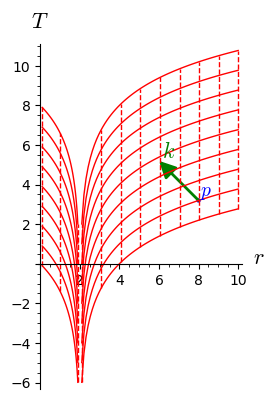

In [56]:
plot1 += kp.plot(EF, color='green', ambient_coords=(r,T), 
                 parameters={m: 1}, scale=2, label_offset=0.5, 
                 fontsize=16)
plot1

### Vector field defined on an open subset

Let us introduce the exterior $E$ of the black hole as an open subset of $M$:

In [57]:
E = M.open_subset('E', coord_def = {SD: r>2*m})

In [58]:
SD.restrict(E).coord_range()

t: (-oo, +oo); r: (2*m, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

In [59]:
p in E

True

In [60]:
u = E.vector_field(name='u')
u[0] = 1/sqrt(1-2*m/r)
u.display()

u = 1/sqrt(-2*m/r + 1) d/dt

In [61]:
SD_to_EF.restrict(E)

Change of coordinates from Chart (E, (t, r, th, ph)) to Chart (E, (T, r, th, ph))

In [62]:
E.atlas()

[Chart (E, (t, r, th, ph)), Chart (E, (T, r, th, ph))]

In [63]:
u.display(EF.frame().restrict(E))

u = 1/sqrt(-2*m/r + 1) d/dT

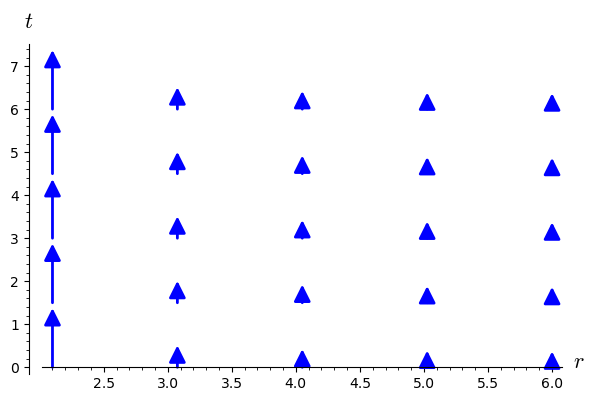

In [64]:
u.plot(ambient_coords=(r, t), fixed_coords={th: pi/2, ph: 0}, 
       ranges={t: (0, 6), r: (2.1, 6)}, number_values=5, 
       parameters={m: 1}, scale=0.3)

In [65]:
u.at(p).display()

u = 2/3*sqrt(3) d/dt

## Metric tensor

We define next the **metric tensor** $g$ from its non-vanishing components in the manifold's default frame, namely the coordinate frame associated to Schwarzschild-Droste coordinate:

In [66]:
g = M.metric()
g[0, 0] = - (1 - 2*m/r)
g[1, 1] = 1/(1 - 2*m/r)
g[2, 2] = r^2
g[3, 3] = r^2*sin(th)^2

In [67]:
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [68]:
SD.coframe()

Coordinate coframe (M, (dt,dr,dth,dph))

In [69]:
g[:]

[     2*m/r - 1              0              0              0]
[             0 -1/(2*m/r - 1)              0              0]
[             0              0            r^2              0]
[             0              0              0  r^2*sin(th)^2]

In [70]:
g[1,1]

-1/(2*m/r - 1)

$g_{rr}$ is diverging at $r=2m$: this is a singularity of the Schwarszchild-Droste coordinates.

In [71]:
g.display_comp()

g_t,t = 2*m/r - 1 
g_r,r = -1/(2*m/r - 1) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

The components of $g$ with respect to the Eddington-Finkelstein frame are evaluated via the methods `comp` or `display`:

In [72]:
g.display(EF.frame())

g = (2*m/r - 1) dT*dT + 2*m/r dT*dr + 2*m/r dr*dT + (2*m + r)/r dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [73]:
g[EF.frame(),:]

[    2*m/r - 1         2*m/r             0             0]
[        2*m/r   (2*m + r)/r             0             0]
[            0             0           r^2             0]
[            0             0             0 r^2*sin(th)^2]

Note that these components are regular at $r=2m$, contrary to the components in Schwarzschild-Droste coordinates.

The metric tensor is a twice-covariant tensor (actually a field of symmetric bilinear forms):

In [74]:
g.tensor_type()

(0, 2)

It can be thus be applied to a pair of vector fields, for instance $u$ and $k$:

In [75]:
s = g(u, k)
s

Scalar field g(u,k) on the Open subset E of the 4-dimensional Lorentzian manifold M

In [76]:
print(s)

Scalar field g(u,k) on the Open subset E of the 4-dimensional Lorentzian manifold M


In [77]:
s.display()

g(u,k): E --> R
   (t, r, th, ph) |--> -sqrt(r)/sqrt(-2*m + r)

In [78]:
s.expr()

-sqrt(r)/sqrt(-2*m + r)

In [79]:
g(k, k).display()

g(k,k): M --> R
   (t, r, th, ph) |--> 0
   (T, r, th, ph) |--> 0

$u$ is a unit timelike vector:

In [80]:
g(u, u).display()

g(u,u): E --> R
   (t, r, th, ph) |--> -1

Scalar products returned by the method `dot` are actually those formed with $g$:

In [81]:
u.dot(u)

Scalar field u.u on the Open subset E of the 4-dimensional Lorentzian manifold M

In [82]:
u.dot(u).display()

u.u: E --> R
   (t, r, th, ph) |--> -1

## Levi-Civita connection

In [83]:
nabla = g.connection()
print(nabla)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional Lorentzian manifold M


In [84]:
nabla.display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^t_r,t = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_th,r = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th) 
Gam^ph_ph,r = 1/r 
Gam^ph_ph,th = cos(th)/sin(th)

In [85]:
Parallelism().set(nproc=1)

In [86]:
Dk = nabla(k)
Dk

Tensor field nabla_g(k) of type (1,1) on the 4-dimensional Lorentzian manifold M

In [87]:
print(Dk)

Tensor field nabla_g(k) of type (1,1) on the 4-dimensional Lorentzian manifold M


In [88]:
Dk.display()

nabla_g(k) = m/(2*m*r - r^2) d/dt*dt - m/(4*m^2 - 4*m*r + r^2) d/dt*dr + m/r^2 d/dr*dt - m/(2*m*r - r^2) d/dr*dr - 1/r d/dth*dth - 1/r d/dph*dph

In [89]:
Dk.display_comp()

nabla_g(k)^t_t = m/(2*m*r - r^2) 
nabla_g(k)^t_r = -m/(4*m^2 - 4*m*r + r^2) 
nabla_g(k)^r_t = m/r^2 
nabla_g(k)^r_r = -m/(2*m*r - r^2) 
nabla_g(k)^th_th = -1/r 
nabla_g(k)^ph_ph = -1/r

The acceleration $\nabla_k k$ of the vector field $k$:

In [90]:
Ak = Dk.contract(k)
print(Ak)

Vector field on the 4-dimensional Lorentzian manifold M


In [91]:
Ak.display()

0

$k$ is thus geodesic vector. The field lines of $k$ are actually the ingoing radial null geodesics of Schwarzschild spacetime.

Instead of the method contract, one can use index notations to compute $\nabla_k k$ as $k^b \nabla_b k^a$:

In [92]:
Ak == Dk['^a_b']*k['^b']

True

In [93]:
Parallelism().set(nproc=8)

The acceleration $\nabla_u u$ of the vector field $u$:

In [94]:
Au = nabla(u).contract(u)
Au.display()

m/r^2 d/dr

$\nabla g$ is identically zero, since the connection $\nabla$ is compatible with $g$:

In [95]:
Dg = nabla(g)
print(Dg)

Tensor field nabla_g(g) of type (0,3) on the 4-dimensional Lorentzian manifold M


In [96]:
Dg.display()

nabla_g(g) = 0

## Curvature

The **Riemann curvature tensor** is computed as

In [97]:
Riem = g.riemann()
print(Riem)

Tensor field Riem(g) of type (1,3) on the 4-dimensional Lorentzian manifold M


In [98]:
Riem.display_comp(only_nonredundant=True)

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r

The component $\mathrm{Riem}(g)^t_{\ \, rtr} = \mathrm{Riem}(g)^0_{\ \, 101}$ is returned by 

In [99]:
Riem[0,1,0,1]

-2*m/(2*m*r^2 - r^3)

In [100]:
Riem.display_comp(EF.frame(), only_nonredundant=True)

Riem(g)^T_T,T,r = 4*m^2/r^4 
Riem(g)^T_r,T,r = 2*(2*m^2 + m*r)/r^4 
Riem(g)^T_th,T,th = -m/r 
Riem(g)^T_ph,T,ph = -m*sin(th)^2/r 
Riem(g)^r_T,T,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_r,T,r = -4*m^2/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^th_T,T,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_T,r,th = 2*m^2/r^4 
Riem(g)^th_r,T,th = 2*m^2/r^4 
Riem(g)^th_r,r,th = (2*m^2 + m*r)/r^4 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_T,T,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_T,r,ph = 2*m^2/r^4 
Riem(g)^ph_r,T,ph = 2*m^2/r^4 
Riem(g)^ph_r,r,ph = (2*m^2 + m*r)/r^4 
Riem(g)^ph_th,th,ph = -2*m/r

The **Kretschmann scalar** is the "square" of the Riemann tensor defined by 
$$K = R_{abcd} \, R^{abcd}, \qquad R := \mathrm{Riem}(g)$$
To compute it, we must first form the tensor fields whose components are $R_{abcd}$ and 
$R^{abcd}$. They are obtained by respectively lowering and raising the indices of the components $R^a_{\ \, bcd}$ of the Riemann tensor, via the metric $g$. These two operations are performed by the methods `down()` and `up()`. The contraction is performed by summation on repeated indices, using LaTeX notations:

In [101]:
K = Riem.down(g)['_{abcd}'] * Riem.up(g)['^{abcd}']
print(K)
K.display()

Scalar field on the 4-dimensional Lorentzian manifold M


M --> R
(t, r, th, ph) |--> 48*m^2/r^6
(T, r, th, ph) |--> 48*m^2/r^6

In [102]:
K.expr()

48*m^2/r^6

Since $\lim_{r\to 0} K = +\infty$, we may say that $r=0$ is a **curvature singularity** of Schwarzschild spacetime.

### Ricci tensor

In [103]:
Ric = g.ricci()
print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional Lorentzian manifold M


We check that the Schwarzschild metric is a solution of the vacuum **Einstein equation**:

In [104]:
Ric.display()

Ric(g) = 0

## Geodesics

First, for graphical purposes, we introduce the **Euclidean space** $\mathbb{E}^3$ and some map $M\to \mathbb{E}^3$:

In [105]:
E3.<x,y,z> = EuclideanSpace()
X3 = E3.cartesian_coordinates()
to_E3 = M.diff_map(E3, {(SD, X3): 
                        [r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)]})
to_E3.display()

M --> E^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))
   (T, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

## A timelike geodesic

Let us consider the geodesic starting at point $p$ and having the following tangent vector at $p$ (note that the tangent vector $v_0$ is constructed by means of the call operator `()` acting of the parent, which is the tangent space to $M$ at $p$): 

In [106]:
v0 = M.tangent_space(p)((1.3, 0, 0, 0.064/m), name='v_0')
v0.display()

v_0 = 1.30000000000000 d/dt + 0.0640000000000000/m d/dph

We declare the geodesic with such initial conditions, denoting by $s$ the affine parameter (proper time), with $(s_{\rm min}, s_{\rm max})=(0, 1500\,m)$:

In [107]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 2000), v0)
geod

Integrated geodesic in the 4-dimensional Lorentzian manifold M

Note that the initial point `p` is not explicitely passed in the argument list of `integrated_geodesic`, because this piece of information is contained in `v0`:

In [108]:
p is v0.parent().base_point()

True

In [109]:
sol = geod.solve(parameters_values={m: 1})  # numerical integration
interp = geod.interpolate()                 # interpolation of the solution for the plot

In [110]:
geod.plot_integrated(chart=X3, mapping=to_E3, plot_points=1000, 
                     thickness=2, label_axes=False) \
+ p.plot(chart=X3, mapping=to_E3, size=4, parameters={m: 1}) \
+ sphere(size=2, color='grey')

Graphics3d Object

A 2D view by suppressing $z$ from the ambient coordinates:

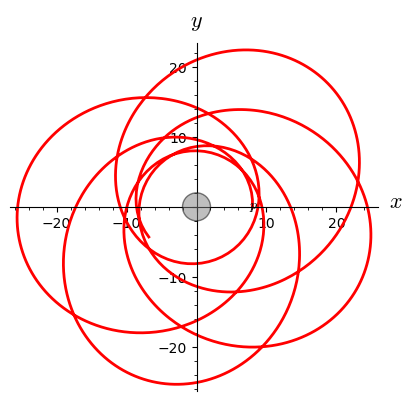

In [111]:
bh_plot = circle((0, 0), 2, edgecolor='black', fill=True, facecolor='grey', alpha=0.5)
geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), plot_points=1000, 
                     thickness=2) \
+ p.plot(chart=X3, mapping=to_E3, ambient_coords=(x,y), size=4, parameters={m: 1}) \
+ bh_plot

## Null geodesics

Let us consider a null geodesique $\mathscr{L}$ in the equatorial plane ($\theta = \pi/2$). 
The null vector $v$ tangent to $\mathscr{L}$ and associated to some affine parameter $\lambda$ is given by the following first integrals of the geodesic equation:
$$
    v^t = \frac{\mathrm{d}t}{\mathrm{d}\lambda} =  \left(1 - \frac{2m}{r} \right)^{-1}
$$
$$
    v^r = \frac{\mathrm{d}r}{\mathrm{d}\lambda} = \pm \sqrt{1 - \frac{b^2}{r^2} \left(1 - \frac{2m}{r} \right) }
$$
$$
    v^\theta = \frac{\mathrm{d}\theta}{\mathrm{d}\lambda} = 0
$$
$$
    v^\varphi = \frac{\mathrm{d}\varphi}{\mathrm{d}\lambda} = \frac{b}{r^2}
$$
where the constant $b$ is related to the conserved energy $E$ and conserved angular momentum $L$ along the geodesic by 
$$
    b = \frac{L}{E} . 
$$
For a geodesic arising from infinity, $b$ is the **impact parameter**.

To set up the initial vector for the computation of a null geodesic, let us define a function that takes $b$ and some initial radius $r_0$ as input and returns the initial vector $v_0$. We take advantage that SageMath is built atop Python to construct this function as a pure Python function:

In [112]:
def initial_vector(r0, b, phi0=0, inward=True):
    r"""
    Evaluate the initial tangent vector along a null geodesic. 
    
    INPUT:
    
    - r0: radial SD coordinate of the initial point
    - b: impact parameter
    - phi0: azimuthal SD coordinate of the initial point (default: 0)
    - inward: determines whether the geodesic has initially v^r < 0 (default: True)
    
    """
    vt0 = 1/(1 - 2*m/r0)
    vr0 = sqrt(1 - b^2/r0^2*(1 - 2*m/r0))
    if inward:
        vr0 = - vr0
    vth0 = 0
    vph0 = b / r0^2
    p0 = M((0, r0, pi/2, phi0), name='p_0')  # initial point
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')

Let us use this function to construct the initial vector for $r_0 = 10m$ and $b=7m$:

In [113]:
v0 = initial_vector(10*m, 7*m)
v0.display()

v_0 = 5/4 d/dt - 2/5*sqrt(19/5) d/dr + 7/100/m d/dph

Let us check that $v_0$ is a null vector:

In [114]:
p0 = v0.parent().base_point()
g.at(p0)(v0, v0)

0

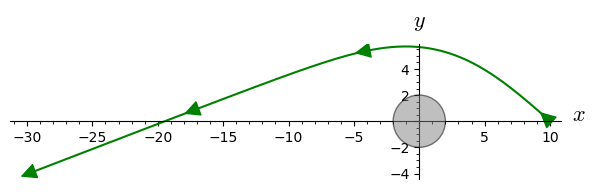

In [115]:
geod = M.integrated_geodesic(g, (s, 0, 40), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 = geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                             plot_points=500, color='green', thickness=1.5, display_tangent=True, 
                             color_tangent='green', plot_points_tangent=4, scale=1) 
plot2 += bh_plot
plot2

A null geodesic plunging into the black hole:

In [116]:
v0 = initial_vector(10*m, 5*m)
v0.display()

v_0 = 5/4 d/dt - 2*sqrt(1/5) d/dr + 1/20/m d/dph

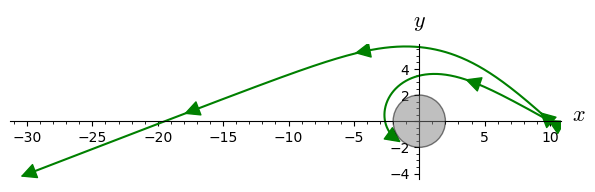

In [117]:
geod = M.integrated_geodesic(g, (s, 0, 13), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='green', thickness=1.5, display_tangent=True, 
                              color_tangent='green', plot_points_tangent=3, scale=0.2)
plot2

### The photon orbit

The photon orbit corresponds to $r_0=3m$ with the following critical value of the impact parameter: 
$$
    b_{\rm c} = 3\sqrt{3}\, m
$$

In [118]:
bc = 3*sqrt(3)*m
n(bc/m)

5.19615242270663

In [119]:
v0 = initial_vector(3*m, bc)
v0.display()

v_0 = 3 d/dt + 1/3*sqrt(3)/m d/dph

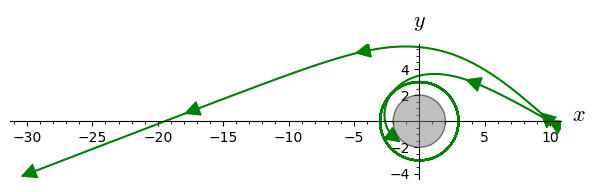

In [120]:
geod = M.integrated_geodesic(g, (s, 0, 100), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='green', thickness=1.5)
plot2

A geodesic with $b$ close to $b_{\rm c}$ wraps around the circular orbit:  

In [121]:
v0 = initial_vector(10*m, 5.2025*m)

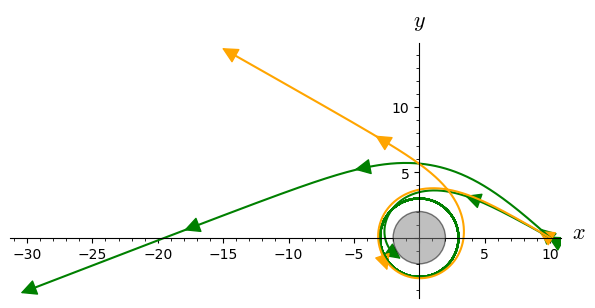

In [122]:
geod = M.integrated_geodesic(g, (s, 0, 40), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='orange', thickness=1.5,
                              display_tangent=True, color_tangent='orange', 
                              plot_points_tangent=4, scale=1)
plot2

## Using SymPy as the symbolic backend

By default, the symbolic backend used in tensor calculus is SageMath's one (Pynac + Maxima), implemented via the symbolic ring `SR`. We can choose to use SymPy instead:

In [123]:
M.set_calculus_method('sympy')

In [124]:
v = 2*k

In [125]:
v.display()

2*r/(-2*m + r) d/dt - 2 d/dr

In [126]:
v[0]

2*r/(-2*m + r)

In [127]:
v[0].expr()

2*r/(-2*m + r)

In [128]:
type(v[0].expr())

<class 'sympy.core.mul.Mul'>

In [129]:
M.set_calculus_method('SR')

In [130]:
type(v[0].expr())

<class 'sage.symbolic.expression.Expression'>

# Going further


Visit the [SageManifolds examples](http://sagemanifolds.obspm.fr/examples.html). 